In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

2023-11-19 07:43:44.048632: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Data preparation

In [2]:
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
def make_model(input_shape, conv_filters, conv_kernel_size, pool_size, learning_rate=0.002, momentum=0.8):
    inputs = keras.Input(shape=input_shape)

    cnn_layer = keras.layers.Conv2D(
        conv_filters,
        conv_kernel_size,
        activation='relu',
    )(inputs)
    
    pooling_layer = keras.layers.MaxPooling2D(pool_size=pool_size)(cnn_layer)
    vectors = keras.layers.Flatten()(pooling_layer)
    inner = keras.layers.Dense(64, activation='relu')(vectors)
    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)
    
    model = keras.Model(inputs, outputs)
    
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    loss = keras.losses.BinaryCrossentropy()
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [4]:
# total images in train/test is 4595
# validation_split is 0.25
train_data_dir = './data/train'
test_data_dir = './data/test'
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

val_ds = train_gen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [5]:
train_ds.class_indices, val_ds.class_indices

({'bee': 0, 'wasp': 1}, {'bee': 0, 'wasp': 1})

In [6]:
model = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

2023-11-19 07:43:45.801053: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 07:43:45.808381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 07:43:45.809032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-19 07:43:45.809977: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

In [7]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2023-11-19 07:43:48.016025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-19 07:43:48.715443: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 07:43:48.715919: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 07:43:48.715966: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-11-19 07:43:48.716519: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-19 07:43:48.716619: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


115/115 [==============================] - 12s 82ms/step - loss: 0.6425 - accuracy: 0.6307 - val_loss: 0.5695 - val_accuracy: 0.7146
Epoch 2/10
115/115 [==============================] - 9s 81ms/step - loss: 0.5271 - accuracy: 0.7457 - val_loss: 0.5179 - val_accuracy: 0.7386
Epoch 3/10
115/115 [==============================] - 9s 80ms/step - loss: 0.4669 - accuracy: 0.7887 - val_loss: 0.5344 - val_accuracy: 0.7462
Epoch 4/10
115/115 [==============================] - 9s 82ms/step - loss: 0.4282 - accuracy: 0.8055 - val_loss: 0.5043 - val_accuracy: 0.7527
Epoch 5/10
115/115 [==============================] - 9s 80ms/step - loss: 0.3951 - accuracy: 0.8273 - val_loss: 0.4965 - val_accuracy: 0.7712
Epoch 6/10
115/115 [==============================] - 9s 81ms/step - loss: 0.3476 - accuracy: 0.8618 - val_loss: 0.5240 - val_accuracy: 0.7462
Epoch 7/10
115/115 [==============================] - 9s 82ms/step - loss: 0.3098 - accuracy: 0.8749 - val_loss: 0.5273 - val_accuracy: 0.7527
Epoch 8/1

# Question 1

In [8]:
# use binary cross entropy loss function for binary classification

# Question 2

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

# Question 3

In [10]:
train_data_gen2 = ImageDataGenerator(rescale=1./255)
train_gen2 = train_data_gen2.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen2 = ImageDataGenerator(rescale=1./255)
test_gen2 = test_data_gen2.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

model2 = make_model((150, 150, 3), 32, (3, 3), (2, 2), learning_rate=0.002, momentum=0.8)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [11]:
hist2 = model2.fit(
    train_gen2,
    epochs=10,
    validation_data=test_gen2
)

Epoch 1/10
184/184 [==============================] - 10s 50ms/step - loss: 0.6954 - accuracy: 0.5287 - val_loss: 0.6777 - val_accuracy: 0.5850
Epoch 2/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6772 - accuracy: 0.5627 - val_loss: 0.6439 - val_accuracy: 0.6187
Epoch 3/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6525 - accuracy: 0.6097 - val_loss: 0.6217 - val_accuracy: 0.6242
Epoch 4/10
184/184 [==============================] - 9s 48ms/step - loss: 0.6136 - accuracy: 0.6614 - val_loss: 0.5779 - val_accuracy: 0.7059
Epoch 5/10
184/184 [==============================] - 9s 48ms/step - loss: 0.5666 - accuracy: 0.7147 - val_loss: 0.5567 - val_accuracy: 0.7048
Epoch 6/10
184/184 [==============================] - 9s 49ms/step - loss: 0.5403 - accuracy: 0.7359 - val_loss: 0.5362 - val_accuracy: 0.7309
Epoch 7/10
184/184 [==============================] - 8s 45ms/step - loss: 0.5126 - accuracy: 0.7593 - val_loss: 0.5369 - val_accuracy: 0.729

In [12]:
hist2.history

{'loss': [0.6954396963119507,
  0.6772051453590393,
  0.6524572968482971,
  0.6135765910148621,
  0.5666470527648926,
  0.5403436422348022,
  0.5126460194587708,
  0.4897094964981079,
  0.4690507650375366,
  0.4563712775707245],
 'accuracy': [0.5286918878555298,
  0.5626869797706604,
  0.6097362041473389,
  0.6614087820053101,
  0.7147130966186523,
  0.7359260320663452,
  0.7593146562576294,
  0.7764481902122498,
  0.7946695685386658,
  0.7973891496658325],
 'val_loss': [0.6776949763298035,
  0.6439133882522583,
  0.6217292547225952,
  0.5778939723968506,
  0.5567148923873901,
  0.5362234711647034,
  0.5368881225585938,
  0.5212743282318115,
  0.5606775283813477,
  0.5355856418609619],
 'val_accuracy': [0.584967315196991,
  0.6187363862991333,
  0.6241829991340637,
  0.7058823704719543,
  0.7047930359840393,
  0.7309368252754211,
  0.7298474907875061,
  0.7516340017318726,
  0.6971677541732788,
  0.7342047691345215]}

In [13]:
np.median(hist2.history['accuracy'])

0.7253195643424988

# Question 4

In [14]:
np.mean(hist2.history['loss']), np.std(hist2.history['loss'])

(0.5673446983098984, 0.08341744413947431)

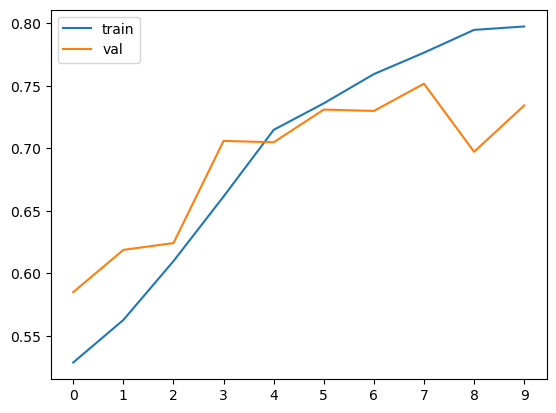

In [15]:
plt.plot(hist2.history['accuracy'], label='train')
plt.plot(hist2.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

In [16]:
train_data_gen3 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
train_gen3 = train_data_gen3.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
)

test_data_gen3 = ImageDataGenerator(rescale=1./255)
test_gen3 = test_data_gen3.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,
    class_mode='binary'
)

hist3 = model2.fit(
    train_gen3,
    epochs=10,
    validation_data=test_gen3
)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.
Epoch 1/10
184/184 [==============================] - 25s 133ms/step - loss: 0.5119 - accuracy: 0.7604 - val_loss: 0.5013 - val_accuracy: 0.7789
Epoch 2/10
184/184 [==============================] - 25s 133ms/step - loss: 0.5011 - accuracy: 0.7699 - val_loss: 0.4874 - val_accuracy: 0.7702
Epoch 3/10
184/184 [==============================] - 24s 133ms/step - loss: 0.4902 - accuracy: 0.7786 - val_loss: 0.5084 - val_accuracy: 0.7462
Epoch 4/10
184/184 [==============================] - 25s 133ms/step - loss: 0.4762 - accuracy: 0.7803 - val_loss: 0.5389 - val_accuracy: 0.7473
Epoch 5/10
184/184 [==============================] - 24s 133ms/step - loss: 0.4822 - accuracy: 0.7784 - val_loss: 0.4654 - val_accuracy: 0.7843
Epoch 6/10
184/184 [==============================] - 24s 131ms/step - loss: 0.4699 - accuracy: 0.7865 - val_loss: 0.4674 - val_accuracy: 0.7908
Epoch 7/10
184/184 [===========================

In [17]:
hist3.history

{'loss': [0.5118579864501953,
  0.5010568499565125,
  0.4902306795120239,
  0.47622641921043396,
  0.48222821950912476,
  0.46985411643981934,
  0.46699419617652893,
  0.47024667263031006,
  0.4648488759994507,
  0.46608591079711914],
 'accuracy': [0.760402500629425,
  0.7699211239814758,
  0.7786238789558411,
  0.7802556157112122,
  0.778351902961731,
  0.7865107655525208,
  0.7856948375701904,
  0.781887412071228,
  0.7908621430397034,
  0.7862387895584106],
 'val_loss': [0.5013285875320435,
  0.4874446392059326,
  0.5083593130111694,
  0.5389356017112732,
  0.4653896391391754,
  0.4673716425895691,
  0.4739697575569153,
  0.4484111964702606,
  0.46149125695228577,
  0.43861812353134155],
 'val_accuracy': [0.7788671255111694,
  0.7701525092124939,
  0.7461873888969421,
  0.7472766637802124,
  0.7843137383460999,
  0.7908496856689453,
  0.7810457348823547,
  0.7897603511810303,
  0.7788671255111694,
  0.8039215803146362]}

# Question 5

In [18]:
np.mean(hist3.history['val_loss'])

0.47913197576999667

# Question 6

In [19]:
np.mean(hist3.history['val_accuracy'][5:])

0.7888888955116272